<a href="https://colab.research.google.com/github/FranziskoB/Classificacao_Redes_Neurais/blob/main/Keras_Classifica%C3%A7%C3%A3o_com_rede_neural_Previsao_climatica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Sobre o conjunto de dados
####Contexto
Preveja a chuva do dia seguinte treinando modelos de classificação na variável de destino RainTomorrow.

####Conteudo
Este conjunto de dados contém cerca de 10 anos de observações meteorológicas diárias de vários locais da Austrália.

RainTomorrow é a variável de destino a ser prevista. Significa -- choveu no dia seguinte, sim ou não? Esta coluna é Sim se a chuva naquele dia foi de 1 mm ou mais.

####Fonte e Agradecimentos
As observações foram extraídas de numerosas estações meteorológicas. As observações diárias estão disponíveis em http://www.bom.gov.au/climate/data.
Um exemplo das últimas observações meteorológicas em Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definições adaptadas de http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Fonte de dados: http://www.bom.gov.au/climate/dwo/ e http://www.bom.gov.au/climate/data.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importando os dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados= pd.read_csv("/content/drive/MyDrive/MBA DSA/weatherAUS.csv")


In [ ]:
dados.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Tratamento dos dados

visualizando os dados

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
dados=dados[dados.Location=='Albury']## A análise será apenas na cidade de Albury

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 0 to 3039
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3040 non-null   object 
 1   Location       3040 non-null   object 
 2   MinTemp        3029 non-null   float64
 3   MaxTemp        3029 non-null   float64
 4   Rainfall       3011 non-null   float64
 5   Evaporation    0 non-null      float64
 6   Sunshine       0 non-null      float64
 7   WindGustDir    3008 non-null   object 
 8   WindGustSpeed  3008 non-null   float64
 9   WindDir9am     2515 non-null   object 
 10  WindDir3pm     2994 non-null   object 
 11  WindSpeed9am   3031 non-null   float64
 12  WindSpeed3pm   3029 non-null   float64
 13  Humidity9am    3031 non-null   float64
 14  Humidity3pm    3032 non-null   float64
 15  Pressure9am    3035 non-null   float64
 16  Pressure3pm    3032 non-null   float64
 17  Cloud9am       1289 non-null   float64
 18  Cloud3pm

### Separando dados numéricos de dados categóricos

In [ ]:
columns = dados.columns
columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
categorical = [value for value in columns if dados[value].dtype=="object"]
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

#### Colunas com dados faltantes

In [ ]:
Missed1 = [value for value in categorical if dados[value].isnull().sum() !=0 ]
print(Missed1)

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


#### Número de categorias de cada coluna

In [ ]:
Cardinality = list(map(lambda value : print(f"{value} contém {len(dados[value].unique())} categorias") ,categorical))

Date contém 3040 categorias
Location contém 1 categorias
WindGustDir contém 17 categorias
WindDir9am contém 17 categorias
WindDir3pm contém 17 categorias
RainToday contém 3 categorias
RainTomorrow contém 3 categorias


#### Passando os dados para formato data

In [ ]:
dados['Date'].dtype
dados['Date'] = pd.to_datetime(dados['Date'])
dados['Year'] = dados['Date'].dt.year
dados['Month'] = dados['Date'].dt.month
dados['Day'] = dados['Date'].dt.day

<ipython-input-12-6123b2ae69be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Date'] = pd.to_datetime(dados['Date'])
<ipython-input-12-6123b2ae69be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Year'] = dados['Date'].dt.year
<ipython-input-12-6123b2ae69be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

#### Número de dados faltantes em cada coluna

In [ ]:
categorical = [x for x in dados.columns if dados[x].dtype=='object']
Miss = dados[categorical].isnull().sum()
Miss

Location          0
WindGustDir      32
WindDir9am      525
WindDir3pm       46
RainToday        29
RainTomorrow     29
dtype: int64

#### Obtendo dummies dos dados categóricos

In [ ]:
pd.get_dummies(dados.WindGustDir,drop_first = True,dummy_na= True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
pd.get_dummies(dados.WindDir9am,drop_first= True, dummy_na= True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies(dados.WindDir3pm,drop_first = True, dummy_na= True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies(dados.RainToday,drop_first=False,dummy_na=True).head()

,No,Yes,NaN
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


### Variáveis numéricas

In [ ]:
numerical = [value for value in dados.columns if dados[value].dtype!='object']
print("Número: ",len(numerical))
numerical

Número:  20


['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

#### Dados faltantes

In [ ]:
dados[numerical].isnull().sum()

Date                0
MinTemp            11
MaxTemp            11
Rainfall           29
Evaporation      3040
Sunshine         3040
WindGustSpeed      32
WindSpeed9am        9
WindSpeed3pm       11
Humidity9am         9
Humidity3pm         8
Pressure9am         5
Pressure3pm         8
Cloud9am         1751
Cloud3pm         1613
Temp9am             9
Temp3pm             8
Year                0
Month               0
Day                 0
dtype: int64

#### Box plot e histograma das variáveis numéricas

Text(0, 0.5, 'WindSpeed3pm')

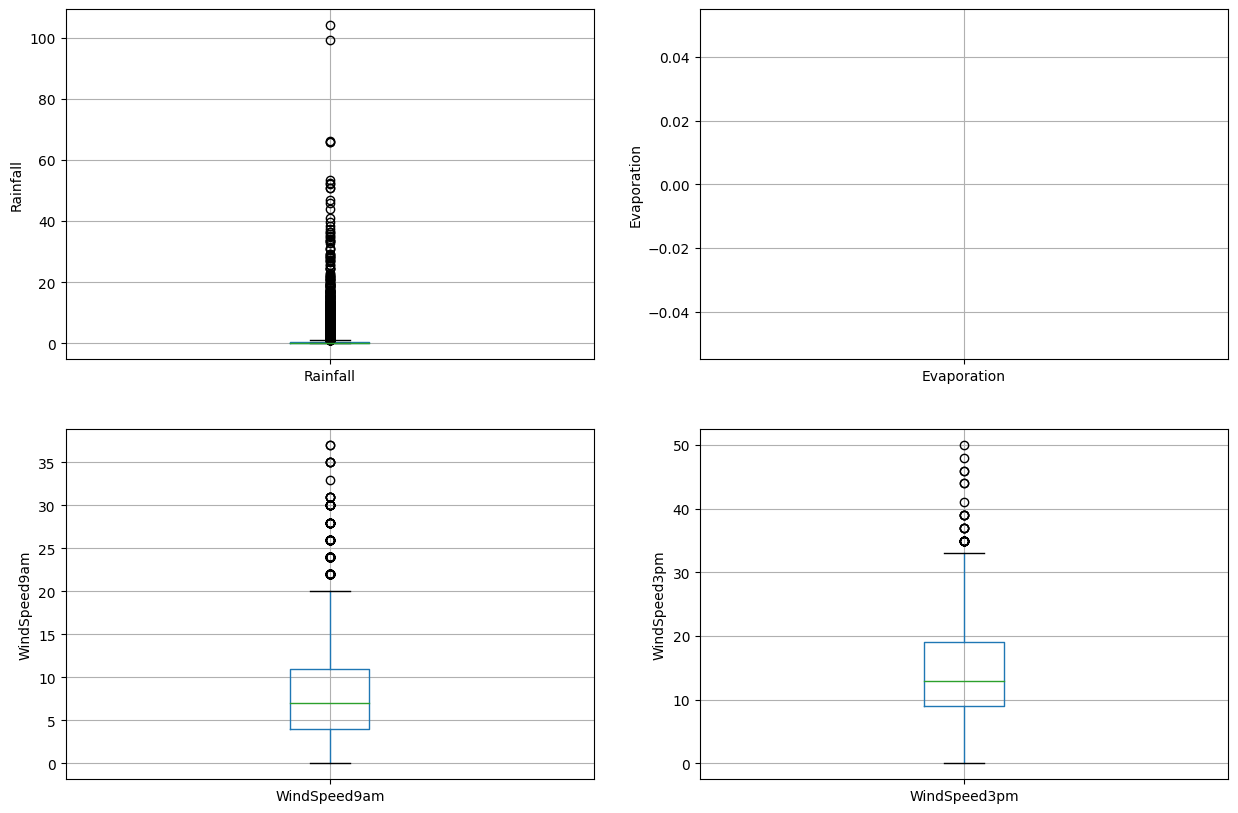

In [ ]:


plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = dados.boxplot(column = 'Rainfall')
fig.set_ylabel('Rainfall')


plt.subplot(2,2,2)
fig = dados.boxplot(column = 'Evaporation')
fig.set_ylabel('Evaporation')


plt.subplot(2,2,3)
fig = dados.boxplot(column='WindSpeed9am')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2,2,4)
fig = dados.boxplot(column='WindSpeed3pm')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

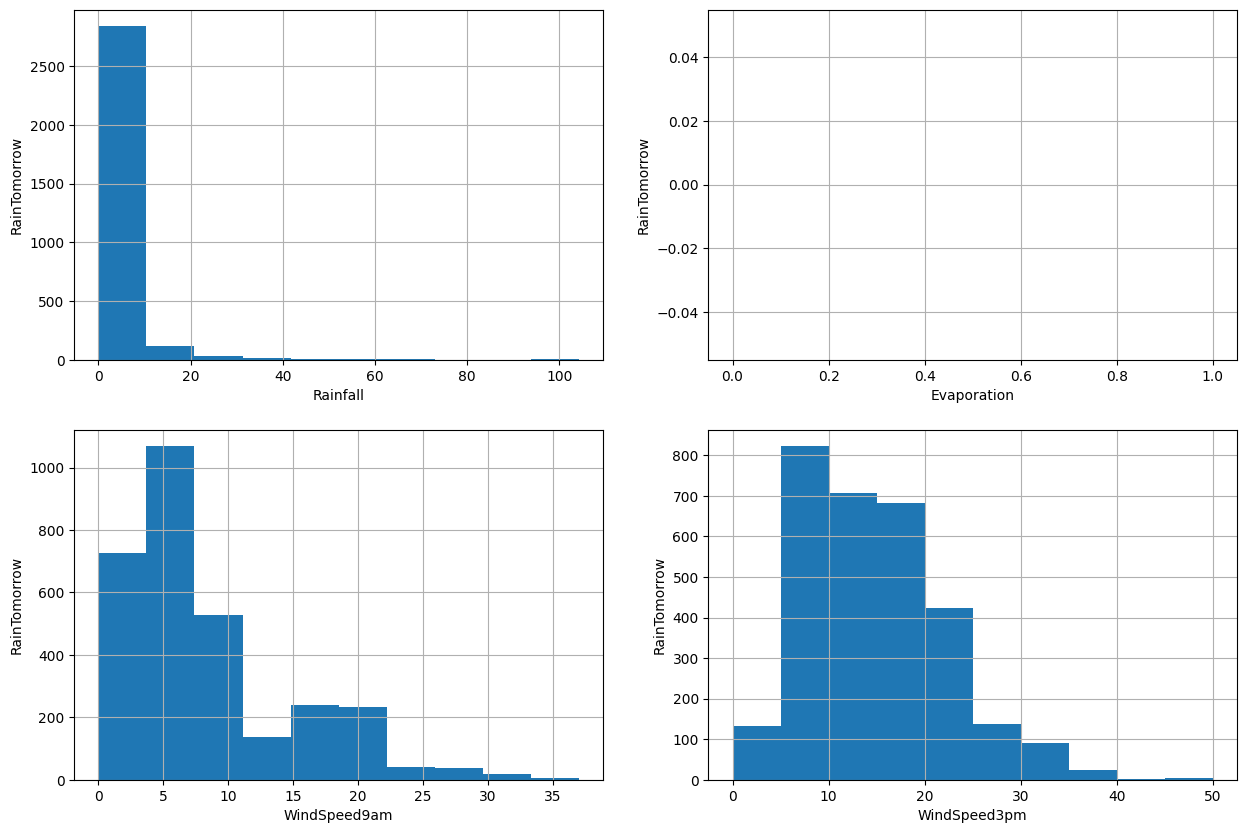

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = dados.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,2)
fig = dados.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,3)
fig = dados.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,4)
fig = dados.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

### Lidando com os dados faltantes

In [ ]:
print(dados[numerical].isnull().sum())# Quantidade de observações

Date                0
MinTemp            11
MaxTemp            11
Rainfall           29
Evaporation      3040
Sunshine         3040
WindGustSpeed      32
WindSpeed9am        9
WindSpeed3pm       11
Humidity9am         9
Humidity3pm         8
Pressure9am         5
Pressure3pm         8
Cloud9am         1751
Cloud3pm         1613
Temp9am             9
Temp3pm             8
Year                0
Month               0
Day                 0
dtype: int64


Substituindo dados faltates pelas medianas de cada colunas e excluinod as colunas sem dados

In [ ]:
numerical.remove('Evaporation')
numerical.remove('Sunshine')

In [ ]:
for col in numerical:
      col_median = dados[col].median()
      dados[col].fillna(col_median,inplace = True)

In [ ]:
print(dados[numerical].isnull().sum())# Quantidade de observações

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64


In [ ]:
categorical.remove('RainTomorrow')


dados[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.010526
WindDir9am     0.172697
WindDir3pm     0.015132
RainToday      0.009539
dtype: float64

In [ ]:
#for val in categorical :
   #dados[val].fillna(dados[val].mode()[0], inplace= True) # Substituindo os valores nulos por valores que mais se repetem

In [ ]:
dados=dados[~dados['RainTomorrow'].isnull()]

In [ ]:
dados[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.003321
WindDir9am     0.171704
WindDir3pm     0.013949
RainToday      0.006642
dtype: float64

#### Lidando com outliers

In [ ]:
# Outliers em WindSpeed3pm

IQR = dados.WindSpeed3pm.quantile(0.75) - dados.WindSpeed3pm.quantile(0.25)
Lower_fence = dados.WindSpeed3pm.quantile(0.25) - (IQR*3)
Upper_fence = dados.WindSpeed3pm.quantile(0.75) + (IQR*3)
print(f"WindSpeed3pm outliers são valores < {Lower_fence} ou > {Upper_fence}")

WindSpeed3pm outliers são valores < -21.0 ou > 49.0


In [ ]:
# Outliers em WindSpeed9am

IQR = dados.WindSpeed9am.quantile(0.75) - dados.WindSpeed9am.quantile(0.25)
Lower_fence = dados.WindSpeed9am.quantile(0.25) - (IQR*3)
Upper_fence = dados.WindSpeed9am.quantile(0.75) + (IQR*3)
print(f"WindSpeed9am outliers são valores < {Lower_fence} ou > {Upper_fence}")

WindSpeed9am outliers são valores < -17.0 ou > 32.0


In [ ]:
# Outliers em Evaporation

IQR = dados.Evaporation.quantile(0.75) - dados.Evaporation.quantile(0.25)
Lower_fence = dados.Evaporation.quantile(0.25) - (IQR*3)
Upper_fence = dados.Evaporation.quantile(0.75) + (IQR*3)
print(f"Evaporation outliers são valores < {Lower_fence} ou > {Upper_fence}")

Evaporation outliers são valores < nan ou > nan


In [ ]:
# Outliers em Rainfall
IQR = dados.Rainfall.quantile(0.75) - dados.Rainfall.quantile(0.25)
Lower_fence = dados.Rainfall.quantile(0.25) - (IQR*3)
Upper_fence = dados.Rainfall.quantile(0.75) + (IQR*3)
print(f"Rainfall outliers são valores < {Lower_fence} ou > {Upper_fence}")

Rainfall outliers são valores < -1.2000000000000002 ou > 1.6


In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

dados['Rainfall'] = max_value(dados,'Rainfall',3.2)
dados['Evaporation'] = max_value(dados,'Evaporation',21.8)
dados['WindSpeed9am'] = max_value(dados,'WindSpeed9am',55)
dados['WindSpeed3pm'] = max_value(dados,'WindSpeed3pm',57)

<ipython-input-34-a138218345f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Rainfall'] = max_value(dados,'Rainfall',3.2)
<ipython-input-34-a138218345f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Evaporation'] = max_value(dados,'Evaporation',21.8)
<ipython-input-34-a138218345f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [ ]:
numerical.remove('Date')
numerical.remove('Year')
numerical.remove('Day')
numerical.remove('Month')

In [ ]:
dados_modelo = pd.concat([dados[numerical], pd.get_dummies(dados.RainToday),
                    pd.get_dummies(dados.Location), pd.get_dummies(dados.WindGustDir)
                   ,pd.get_dummies(dados.WindDir9am), pd.get_dummies(dados.WindDir3pm),dados['RainTomorrow'] ], axis= 1 )

In [ ]:
print(dados_modelo.columns)


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'No',
       'Yes', 'Albury', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S',
       'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'E', 'ENE', 'ESE', 'N',
       'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW',
       'WSW', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
       'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'RainTomorrow'],
      dtype='object')


## Separando o modelo em teste e treino

In [ ]:
X = dados_modelo.drop(['RainTomorrow'],axis=1)
Y = dados_modelo['RainTomorrow']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3011 entries, 0 to 3039
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        3011 non-null   float64
 1   MaxTemp        3011 non-null   float64
 2   Rainfall       3011 non-null   float64
 3   WindGustSpeed  3011 non-null   float64
 4   WindSpeed9am   3011 non-null   float64
 5   WindSpeed3pm   3011 non-null   float64
 6   Humidity9am    3011 non-null   float64
 7   Humidity3pm    3011 non-null   float64
 8   Pressure9am    3011 non-null   float64
 9   Pressure3pm    3011 non-null   float64
 10  Cloud9am       3011 non-null   float64
 11  Cloud3pm       3011 non-null   float64
 12  Temp9am        3011 non-null   float64
 13  Temp3pm        3011 non-null   float64
 14  No             3011 non-null   uint8  
 15  Yes            3011 non-null   uint8  
 16  Albury         3011 non-null   uint8  
 17  E              3011 non-null   uint8  
 18  ENE     

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 0)
X_train.shape, X_test.shape

((2408, 65), (603, 65))

## Criando uma rede neural

In [ ]:
import numpy as np
import tensorflow
from tensorflow import keras

In [ ]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()


In [ ]:
y_test=Y_test.map({'Yes':1,'No':0},na_action=None).to_numpy()
y_train=Y_train.map({'Yes':1,'No':0},na_action=None).to_numpy()

## Preparação dos dados

In [ ]:
x_train=x_scaled = min_max_scaler.fit_transform(X_train).astype('float32')#Definindo dados de treino
x_test=x_scaled = min_max_scaler.fit_transform(X_test).astype('float32')#Definindo dados de validação

In [ ]:
x_train.shape

(2408, 65)

In [ ]:
input_dim=65     # Número de variáveis do dataset
hidden_dim =200 # Número de neurônios na camada escondida
output_dim=2    # Número de classes


##Criando modelo

In [ ]:
modelo = keras.Sequential([
    keras.layers.Dense(input_dim, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(output_dim, activation=tensorflow.nn.softmax)
])

## Critério de erro

In [ ]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

##Fluxo de Treinamento & Validação

In [ ]:
historico = modelo.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
61/61 [==============================] - 3s 7ms/step - loss: 0.5761 - accuracy: 0.7321 - val_loss: 0.4757 - val_accuracy: 0.7863
Epoch 2/50
61/61 [==============================] - 0s 5ms/step - loss: 0.5090 - accuracy: 0.7923 - val_loss: 0.4490 - val_accuracy: 0.7863
Epoch 3/50
61/61 [==============================] - 0s 4ms/step - loss: 0.4756 - accuracy: 0.7949 - val_loss: 0.4294 - val_accuracy: 0.7988
Epoch 4/50
61/61 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.8022 - val_loss: 0.4150 - val_accuracy: 0.8091
Epoch 5/50
61/61 [==============================] - 0s 4ms/step - loss: 0.4494 - accuracy: 0.8131 - val_loss: 0.3993 - val_accuracy: 0.8237
Epoch 6/50
61/61 [==============================] - 0s 4ms/step - loss: 0.4198 - accuracy: 0.8209 - val_loss: 0.3917 - val_accuracy: 0.8195
Epoch 7/50
61/61 [==============================] - 0s 5ms/step - loss: 0.4150 - accuracy: 0.8152 - val_loss: 0.3847 - val_accuracy: 0.8340
Epoch 8/50
61/61 [==

## Métricas de avaliação do modelo

In [ ]:
from numpy import std
from sklearn.metrics import accuracy_score

In [ ]:
testes=modelo.predict(x_test)
yhat=np.argmax(testes, axis=1)
previsoes= pd.DataFrame(yhat)
teste_y=y_test

acuracia_GB = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia_GB)

19/19 [==============================] - 0s 2ms/step
A acurácia foi 87.73%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       479
           1       0.77      0.58      0.66       124

    accuracy                           0.88       603
   macro avg       0.83      0.77      0.79       603
weighted avg       0.87      0.88      0.87       603



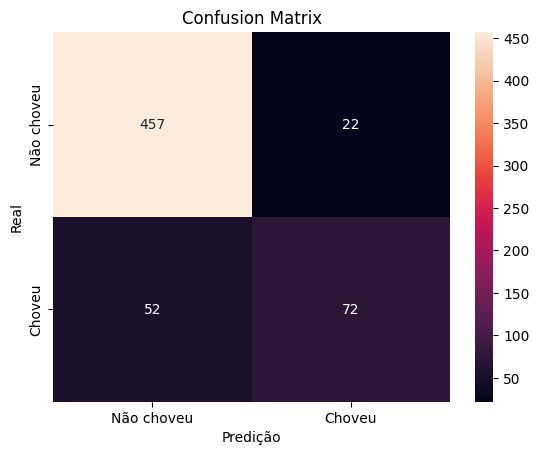

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(teste_y, previsoes, labels=None, sample_weight=None)

# Plot

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predição')
ax.set_ylabel('Real')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Não choveu','Choveu']); ax.yaxis.set_ticklabels(['Não choveu','Choveu']);
plt.show()

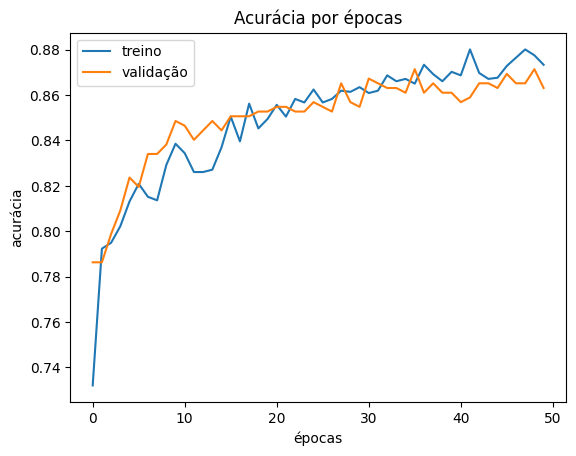

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

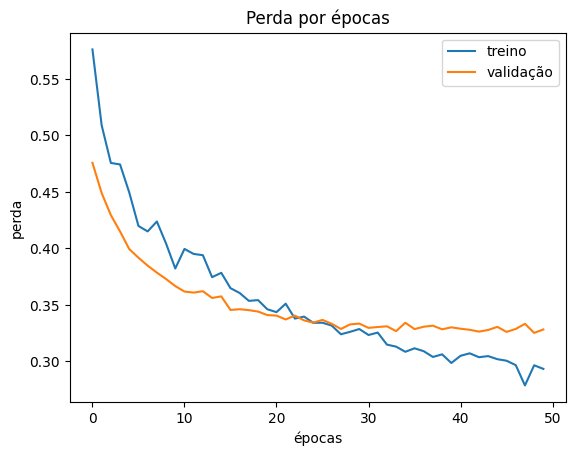

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])